
# Geoherb identification

## Data Set ID: 754a川贝母、浙贝母拉曼光谱

["川贝母","浙贝母"]

<pre>
COLLECTION AND PROCESSING INFORMATION
Title: Position X =-12643 Y = 6208, Signal to noise ratio =24.6
Collected: Wed Mar 23 14:18:22 2022 (GMT+08:00)
Filename: C:\my documents\omnic\GFJ\20220323\chuanbeimu9 23-3-2022 14-9-54.CSV
Comments: 
Custom info 1: 
Custom info 2: 
DATA DESCRIPTION
 Number of points: 1682
 X-axis: Raman shift (cm-1)
 Y-axis: Raman intensity
 First X value: 49.6820
 Last X value: 3291.4346
 Raman laser frequency: 12738.9932
 Data spacing: 1.928467
DATA COLLECTION INFORMATION
 Exposure time: 0.1429 sec
 Number of exposures: 600
 Number of background exposures: 600
SPECTROMETER DESCRIPTION
 Spectrometer: DXR Raman Microscope
 Bench serial number: AXX1916142
 Laser: 785 nm
 Laser serial number: BAB1910322
 Laser power level: 19.0 mW
 Filter: 785 nm
 Filter serial number: BAL1910361
 Grating: 400 lines/mm
 Grating serial number: BAC1910373
 Spectrograph aperture: 50 µm pinhole
 Camera at temperature
</pre>

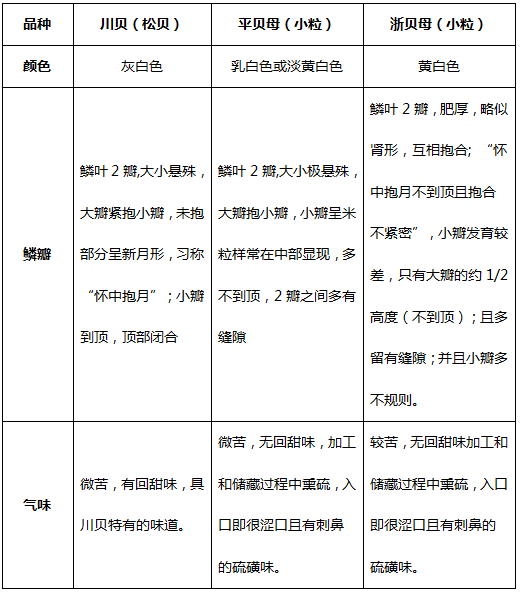

1，川贝母，一般产于西部海拔较高的地区，采挖困难，数量少，甚至有野生的，所以价格较贵。
2，浙贝母，由于人工栽培，产量较大，药材来源丰富，所以价格低廉。浙贝母价格相当于川贝母的十分之一左右。

### 2D scatter plot

In [8]:
%run plotComponents2D.py

### Visualize feature importance

In [201]:
%run feature_importance.py

# Load Data

In [3]:
import pandas as pd
import numpy as np

path = "../data/754a_C2S_Beimu.txt"
data = pd.read_csv(path) # ,header=None

# print(data[data.isna().any(axis=1)])
# there are nan values in the last column. We will skip the last column.

cols = data.shape[1]
# convert from pandas dataframe to numpy matrices
X = np.array(data.iloc[:,2:cols-1].values)
y = np.array(data.iloc[:,0].values.ravel()) # first col is y label

# use map(float, ) to convert the string list to float list
X_names = list(map(float, data.columns.values[2:-1])) # X_names = np.array(list(data)[1:])

labels = list(set(y))

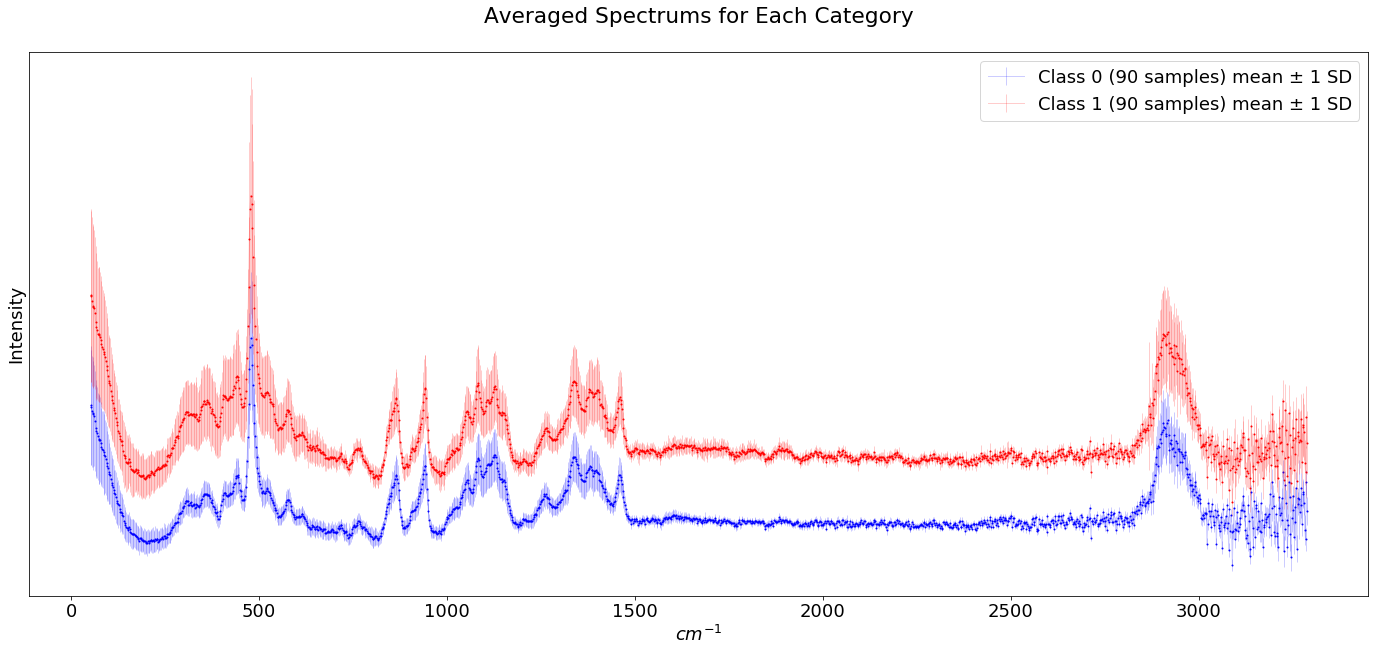

In [5]:
import pylab, matplotlib
matplotlib.rcParams.update({'font.size': 18})
import matplotlib.pyplot as plt

plt.figure(figsize = (24,10))

for c in labels:    
    Xc = X[y == c]
    yc = y[y == c] 
    plt.errorbar(X_names, Xc.mean(axis = 0) + 200*c, Xc.std(axis = 0)*1, 
                 color = ["blue","red","green","orange"][c], 
                 linewidth=1, 
                 alpha=0.2,
                label= 'Class ' + str(c) + ' (' + str(len(yc)) + ' samples)' + ' mean ± 1 SD',
                )  # X.std(axis = 0)
    plt.scatter(X_names, np.mean(Xc,axis=0).tolist() + c*200, 
             color = ["blue","red","green","orange"][c],
              s=1 
             ) 
    plt.legend()

plt.title(u'Averaged Spectrums for Each Category\n')
plt.xlabel(r'$ cm^{-1} $')
plt.ylabel('Intensity')
plt.yticks([])

matplotlib.rcParams.update({'font.size': 10})

# Preprocessing


## Feature Scaling

As the kernels are actually pair-wise distances, we highly recommend do feature scaling.  Otherwise, the high-value features will have dominating effect.

In [6]:
# normalization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# scaling to [0,1]
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
X_mm_scaled = mm_scaler.fit_transform(X)

score =  0.448


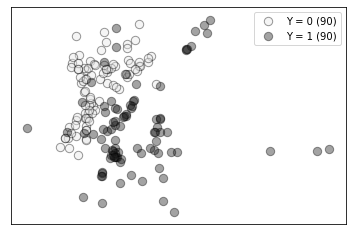

In [9]:
from sklearn.cross_decomposition import PLSRegression

pls = PLSRegression(n_components=2, scale = False)
X_pls = pls.fit(X, y).transform(X)

plotComponents2D(X_pls, y, labels) # , tags = range(len(y)), ax = ax
print('score = ', np.round(pls.score(X, y),3)) # Returns the coefficient of determination R^2 of the prediction.

# knnrw

knnrw = NNRW + Multiple Kernel Learning

### Mercer 定理

任何半正定的函数都可以作为核函数。所谓半正定的函数f(xi,xj)，是指拥有训练数据集合（x1,x2,...xn)，我们定义一个矩阵的元素aij = f(xi,xj)，这个矩阵式n*n的，如果这个矩阵是半正定的，那么f(xi,xj)就称为半正定的函数。这个mercer定理不是核函数必要条件，只是一个充分条件，即还有不满足mercer定理的函数也可以是核函数

# knnrw provides three flavors: 

### flavor = 'sum'

不包含权重或偏置参数的初始化，实为将原始特征转化为一个线性核变换(Gram Matrix)与若干非线性核变换的叠加，得到一个mxm的SumMatrix。模型本身为单层NN

### flavor = 'stack'

拼接为一个大矩阵 [Gram, rbf, sigmoid, ...]，尺寸为m x km。k为拼接的kernel数量

### flavor = 'sum + stack'

拼接为一个大矩阵 [SumMatrix, Gram, rbf, sigmoid, ...]，尺寸为m x (k+1)m。k为拼接的kernel数量

# Install

We have published relavent codes on GitHub: https://github.com/zhangys11/pyNNRW  
The package is published on the PyPi repository and can be installed in python via command: ` pip install pyNNRW==0.2.3 `

# Parameter tuning for each kernel

The Raman data is very high-dimensional. We first check individual kernels to get an optimal param on the domain data.

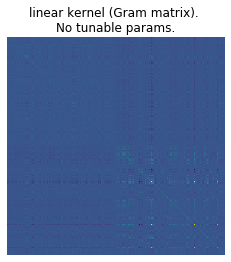

In [206]:
# 返回Gram Matrix: n维欧式空间中任意k个向量之间两两的内积所组成的矩阵，称为这k个向量的格拉姆矩阵(Gram matrix)
plt.imshow(linear_kernel(X_scaled,X_scaled)) # return the Gram matrix, i.e. X @ Y.T.
plt.axis('off')
plt.title('linear kernel (Gram matrix). \nNo tunable params.')
plt.show()

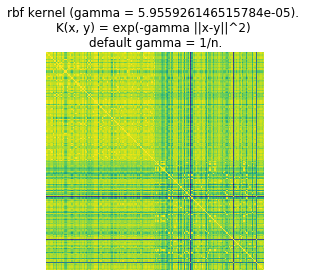

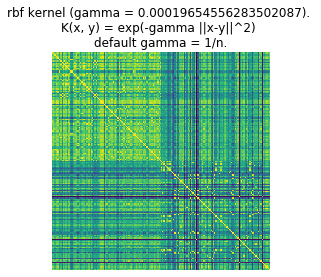

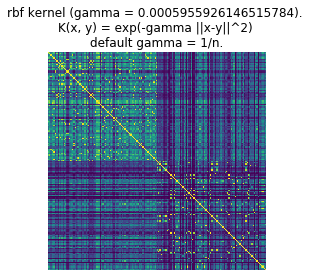

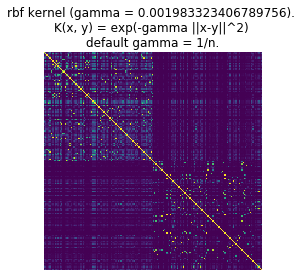

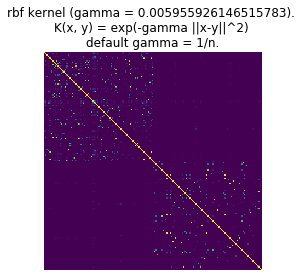

In [207]:
for gamma in [0.1 /X_scaled.shape[1] , 0.33 /X_scaled.shape[1] , 1 /X_scaled.shape[1], 3.33 /X_scaled.shape[1], 10/X_scaled.shape[1]]:
    
    plt.imshow(rbf_kernel(X_scaled,X_scaled, gamma = gamma))
    plt.axis('off')
    plt.title('rbf kernel (gamma = ' +str(gamma)+ '). \nK(x, y) = exp(-gamma ||x-y||^2) \ndefault gamma = 1/n.')
    plt.show()

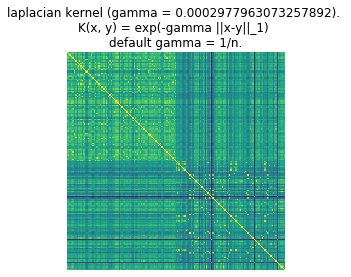

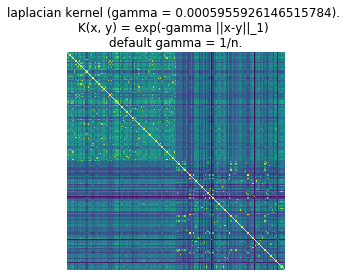

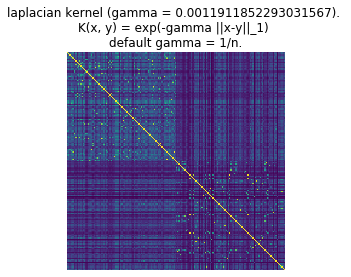

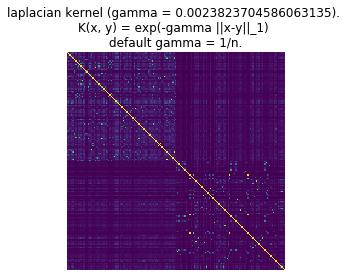

In [208]:
for gamma in [0.5 /X_scaled.shape[1] , 1 /X_scaled.shape[1], 2 /X_scaled.shape[1], 4/X_scaled.shape[1]]:

    plt.imshow(laplacian_kernel(X_scaled,X_scaled, gamma = gamma)) 
    plt.axis('off')
    plt.title('laplacian kernel (gamma = ' +str(gamma)+ '). \nK(x, y) = exp(-gamma ||x-y||_1) \ndefault gamma = 1/n.')
    plt.show()


最优为 sqrt(2)/n

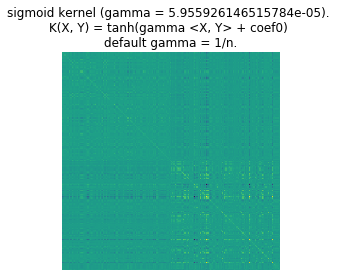

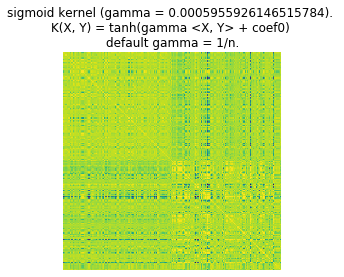

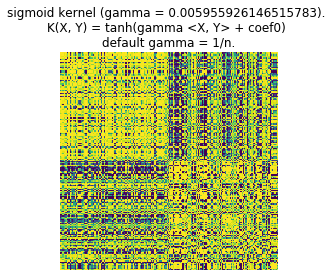

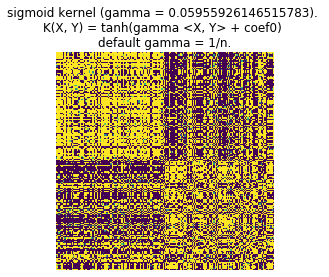

In [209]:
for gamma in [0.1 /X_scaled.shape[1] , 1 /X_scaled.shape[1], 10/X_scaled.shape[1], 100/X_scaled.shape[1]]:
   
    plt.imshow(sigmoid_kernel(X_scaled,X_scaled, gamma = gamma))
    plt.axis('off')
    plt.title('sigmoid kernel (gamma = ' +str(gamma)+ '). \nK(X, Y) = tanh(gamma <X, Y> + coef0) \ndefault gamma = 1/n.')
    plt.show()

最优约为10/3n

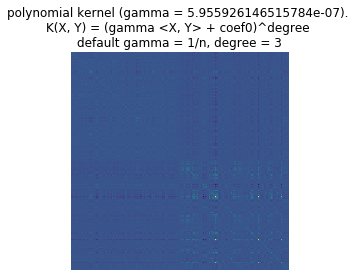

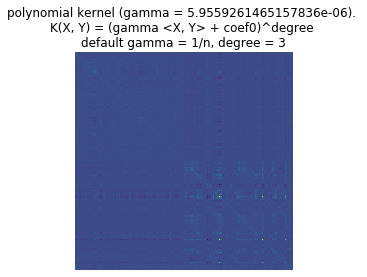

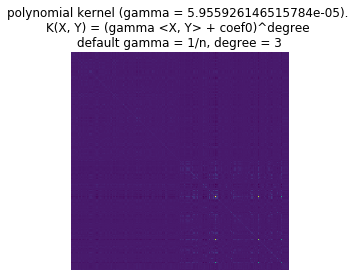

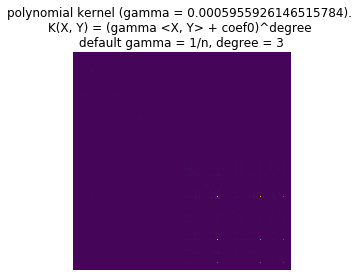

In [210]:
for gamma in [0.001 /X_scaled.shape[1] , 0.01 /X_scaled.shape[1] , 0.1 /X_scaled.shape[1], 1 /X_scaled.shape[1]]:
 
    plt.imshow(polynomial_kernel(X_scaled,X_scaled, gamma = gamma))
    plt.axis('off')
    plt.title('polynomial kernel (gamma = ' +str(gamma)+ '). \nK(X, Y) = (gamma <X, Y> + coef0)^degree \ndefault gamma = 1/n, degree = 3')
    plt.show()

对于高维拉曼数据，多项式核效果不佳，需要gamma非常小，才能显示出一定的pattern

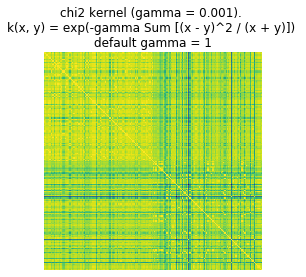

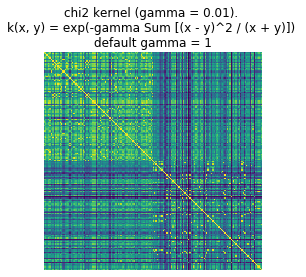

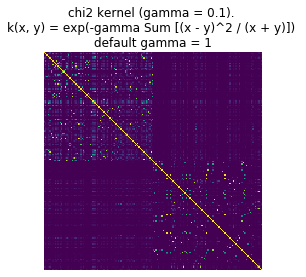

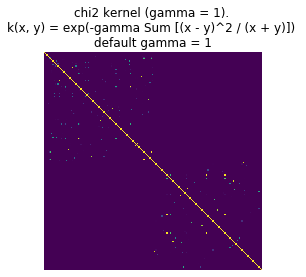

In [211]:
for gamma in [0.001, 0.01 , 0.1 , 1]:
   
    # chi2 requires non-negative input
    plt.imshow(chi2_kernel(X_mm_scaled,X_mm_scaled, gamma = gamma))
    plt.axis('off')
    plt.title('chi2 kernel (gamma = ' +str(gamma)+ '). \nk(x, y) = exp(-gamma Sum [(x - y)^2 / (x + y)]) \ndefault gamma = 1')
    plt.show()

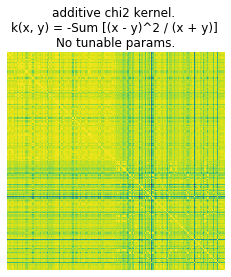

In [212]:
# additive chi2 requires non-negative input
plt.imshow(additive_chi2_kernel(X_mm_scaled, X_mm_scaled))
plt.axis('off')
plt.title('additive chi2 kernel. \nk(x, y) = -Sum [(x - y)^2 / (x + y)] \nNo tunable params.')
plt.show()

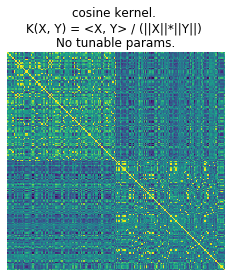

In [213]:
plt.imshow(cosine_similarity(X_scaled,X_scaled))
plt.axis('off')
plt.title('cosine kernel. \nK(X, Y) = <X, Y> / (||X||*||Y||) \nNo tunable params.')
plt.show()

Because the first and last half samples belong to two classes respectively. We want to get a contrasive pattern, i.e., (左上、右下) 与 （左下、右上）差别大。

linear kernel所生产的Gram Matrix 和 poly kernel 不能很好区分高维拉曼的样本距离. additive chi2 pattern较弱，其余kernel在特定param取值下pattern明显

# Grid Search for the best kernel combination

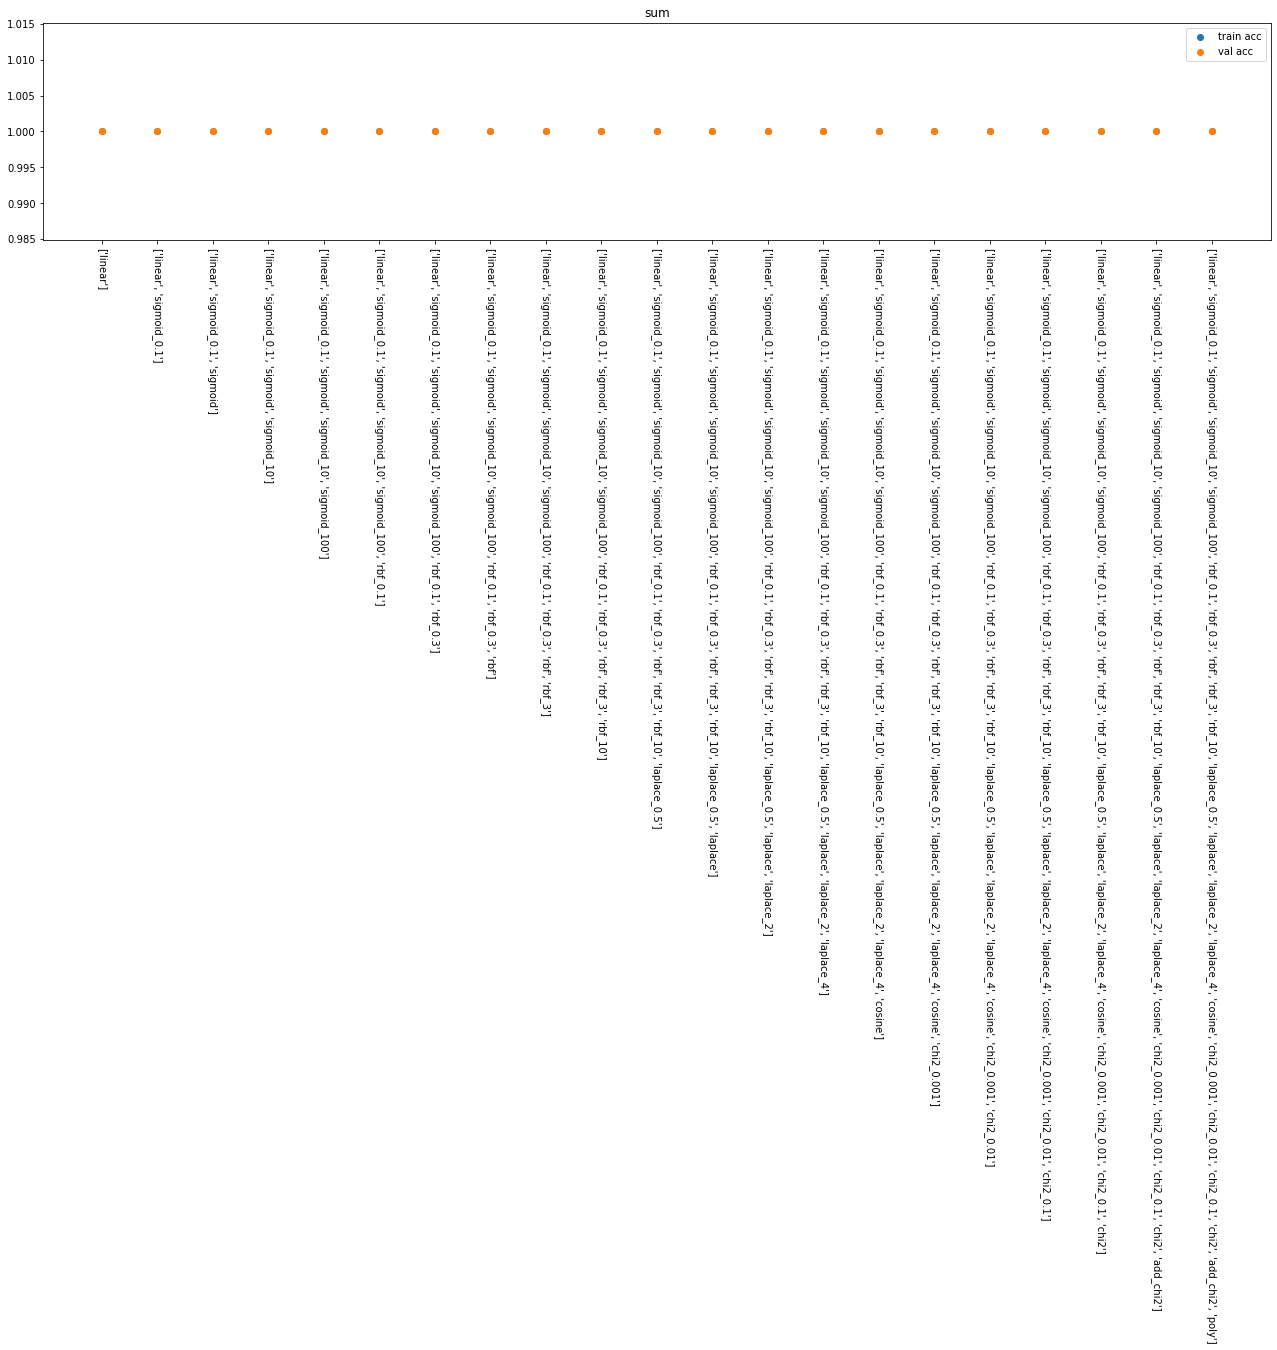

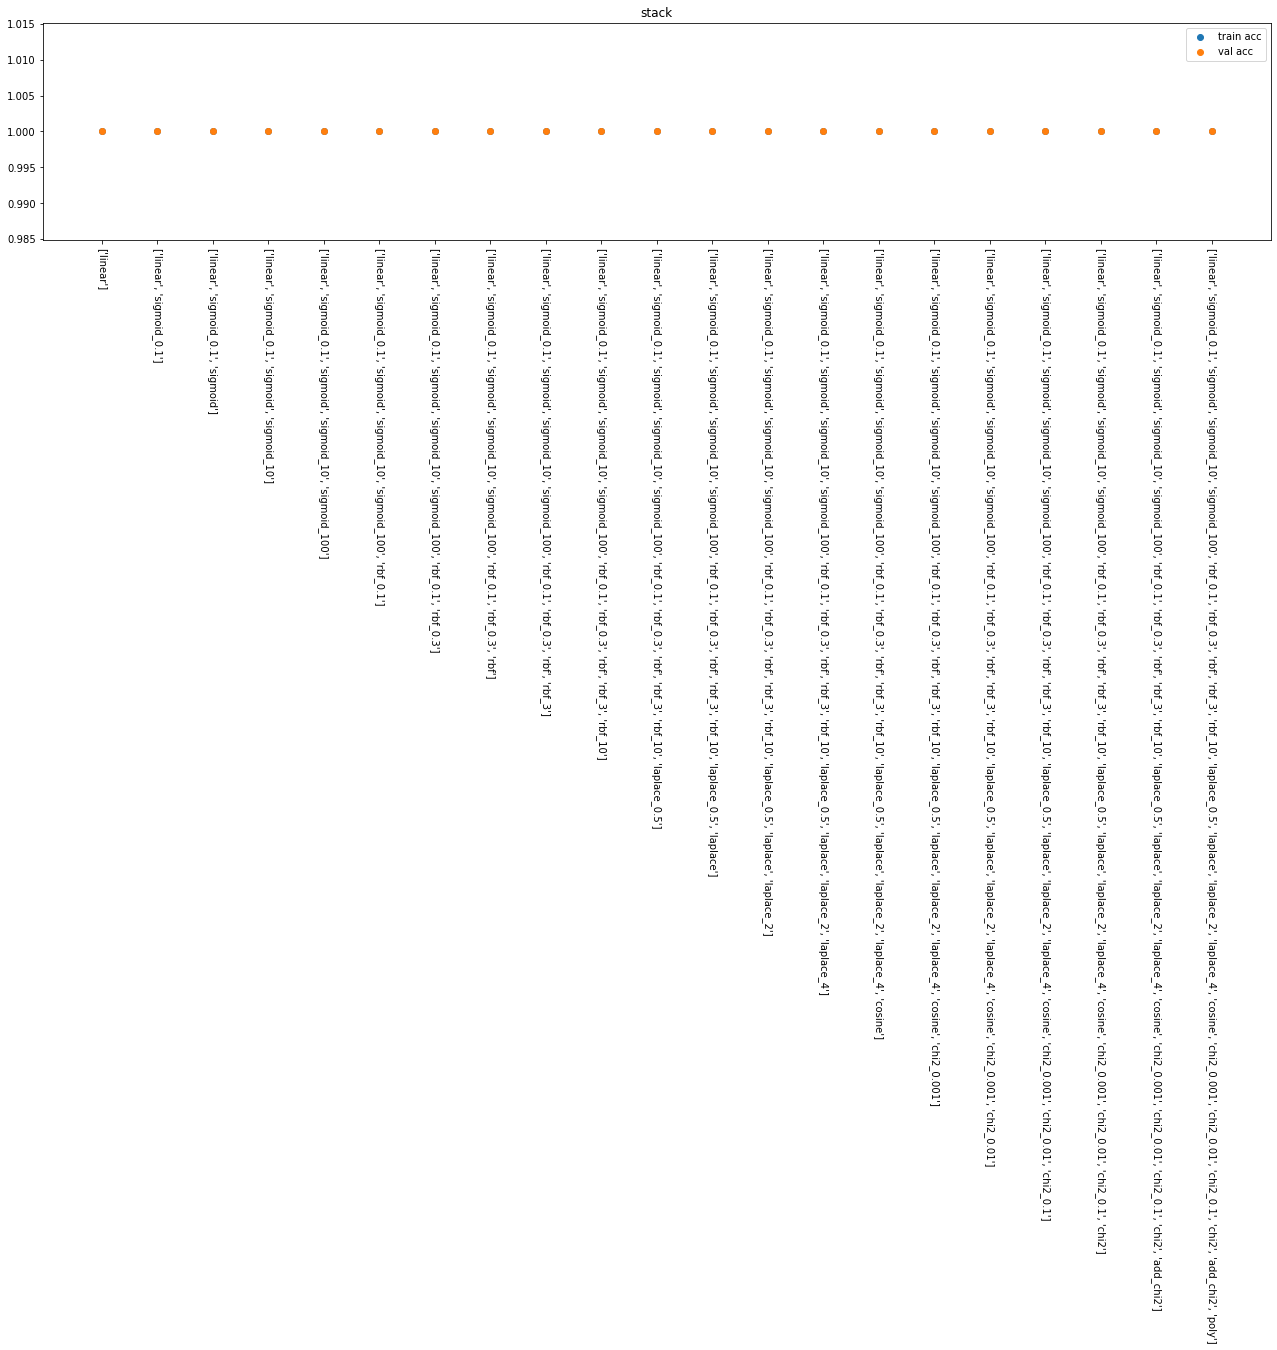

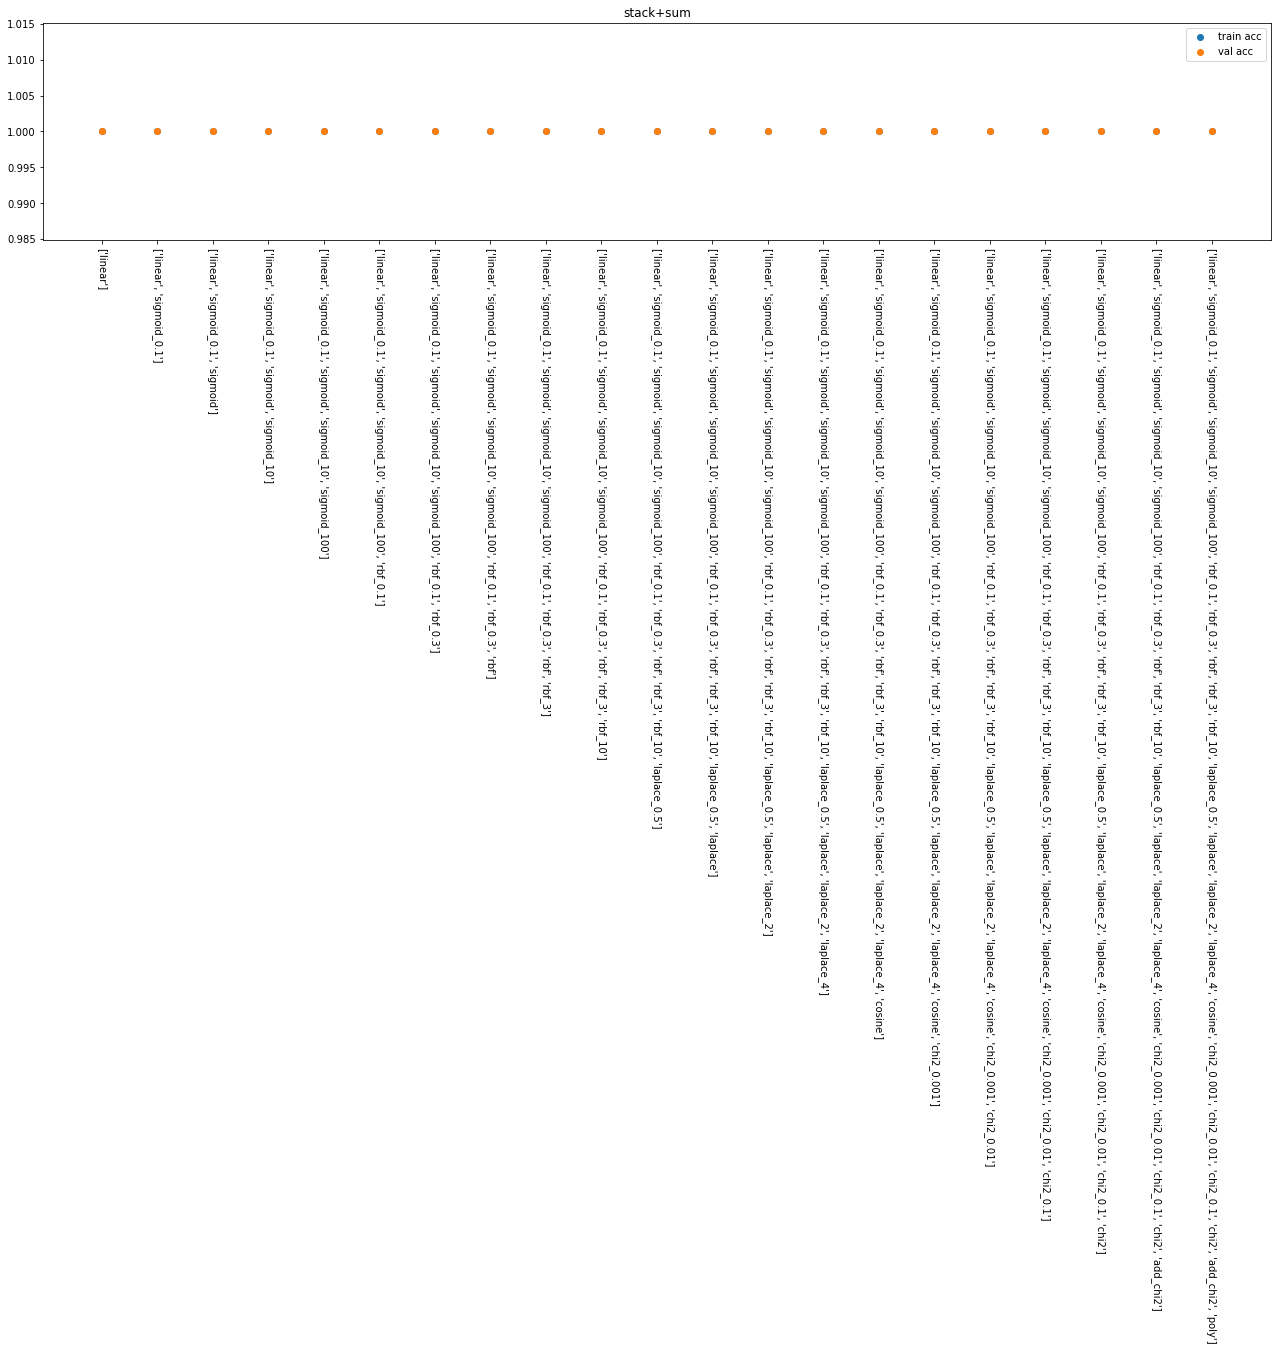

In [22]:
# from pyNNRW.knnrw import *
%run ../src/pyNNRW/knnrw.py

from sklearn.model_selection import train_test_split

x_train, x_test, t_train, t_test = train_test_split(X_mm_scaled, y, test_size=0.3)
_ = KNNRWGridSearch(x_train, x_test, t_train, t_test, verbose = False)

In [2]:
# %run ../src/pyNNRW/nnrw.py
from pyNNRW import nnrw

Using TensorFlow backend.


# Performance comparison. Define a wrapper (use callback function parameter), which calls each specific classifier

Due to inherent randomness (e.g., random initialization), some algorithms (e.g., NNRW, MLP) have slightly different results for each run. 

# A. NNRW - ELM

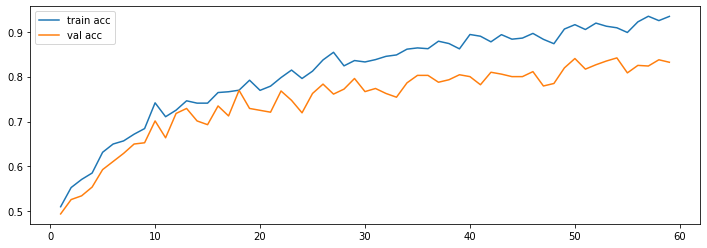

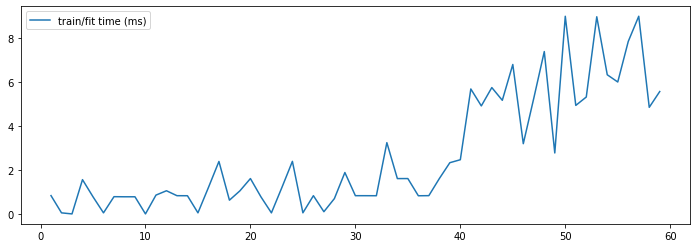

In [10]:
MTacc, MVacc, MT = nnrw.PerformenceTests(nnrw.ELMClf, X, y, Ls = list(range(1, 60)))

In [11]:
IDX = 30
print('Mean Train Acc = ', MTacc[IDX], ' Mean Test Acc = ', MVacc[IDX], ' Mean Consumed Time = ', MT[IDX])

Mean Train Acc =  0.8378472222222222  Mean Test Acc =  0.773611111111111  Mean Consumed Time =  0.8309850000000001


# B. MLP

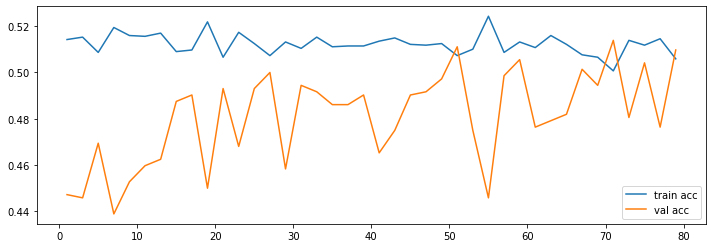

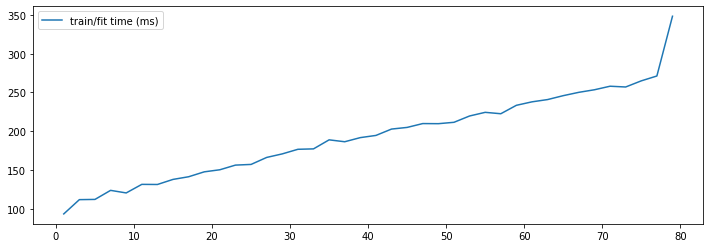

In [12]:
MTacc, MVacc, MT = nnrw.PerformenceTests(nnrw.MLPClf, X, y, Ls = list(range(1, 80, 2)))

In [13]:
IDX = 20
print('Mean Train Acc = ', MTacc[IDX], ' Mean Test Acc = ', MVacc[IDX], ' Mean Consumed Time = ', MT[IDX])

Mean Train Acc =  0.5135416666666667  Mean Test Acc =  0.46527777777777785  Mean Consumed Time =  194.59754000000004


# C. rbf-SVM

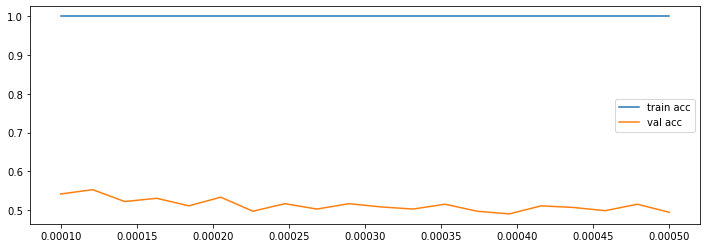

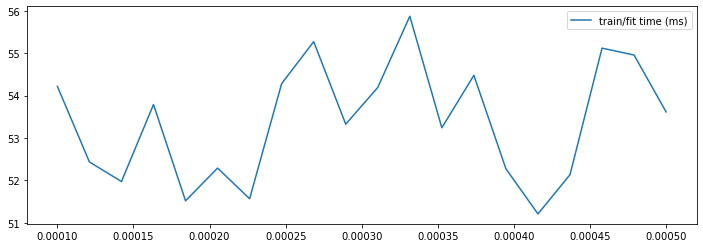

gamma = 1/(2σ^2)


In [14]:
MTacc, MVacc, MT = nnrw.PerformenceTests(nnrw.SVMClf, X, y, Ls = np.linspace(0.0001,0.0005,20).tolist())
print("gamma = 1/(2σ^2)")

In [15]:
IDX = 10 
print('Mean Train Acc = ', MTacc[IDX], ' Mean Test Acc = ', MVacc[IDX], ' Mean Consumed Time = ', MT[IDX])

Mean Train Acc =  1.0  Mean Test Acc =  0.5083333333333332  Mean Consumed Time =  54.193720000000006


# D. Decision Tree

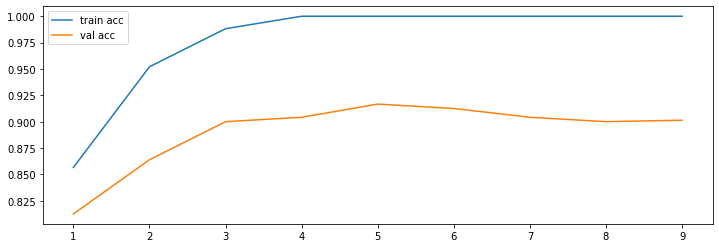

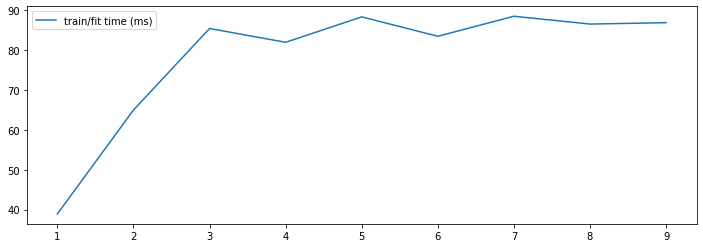

In [16]:
MTacc, MVacc, MT = nnrw.PerformenceTests(nnrw.TreeClf, X, y, Ls = list(range(1,10))) # here we use ys to gurantee it is multi-class, not regression

In [17]:
IDX = 2  # best depth 3
print('Mean Train Acc = ', MTacc[IDX], ' Mean Test Acc = ', MVacc[IDX], ' Mean Consumed Time = ', MT[IDX])

Mean Train Acc =  0.9881944444444445  Mean Test Acc =  0.8999999999999998  Mean Consumed Time =  85.415135


# Appendix

### Raman Interpretation

<table>
    <thead>
        <tr class="text-center">
            <th>Wavenumber (cm-1)</th>
            <th>Raman Shift Interpretation</th>
        </tr>
    </thead>
    <tbody><tr>
                <td>1748</td>
                <td>C=O伸缩振动，主要可能源自于脂肪有关的酯基</td>
            </tr>
            <tr>
                <td>1663</td>
                <td>C=O伸缩振动和C=C伸缩振动，其中C=O伸缩振动可能主要源自于蛋白质的酰胺I键，C=C伸缩振动主要源自于不饱和脂肪酸</td>
            </tr>
            <tr>
                <td>1465</td>
                <td>CH2变形振动，可能主要源自于糖类和脂肪分子</td>
            </tr>
            <tr>
                <td>1337</td>
                <td>糖类的C-H变形振动、C-O伸缩振动或/和游离胆固醇的C-C伸缩振动</td>
            </tr>
            <tr>
                <td>1304/1260</td>
                <td>糖类以及饱和脂肪酸的CH2扭曲振动</td>
            </tr>
            <tr>
                <td>1130</td>
                <td>饱和脂肪酸的C-C伸缩振动或/和糖类的C-C伸缩振动、C-O伸缩振动以及C-O-H变形振动</td>
            </tr>
            <tr>
                <td>1080</td>
                <td>游离胆固醇的C-C伸缩振动或/和糖类的C-C伸缩振动、C-O伸缩振动以及C-O-H变形振动</td>
            </tr>
            <tr>
                <td>930</td>
                <td>胆固醇或/和糖类的C-O-C变形振动、C-O-H变形振动和C-O伸缩振动</td>
            </tr>
            <tr>
                <td>862</td>
                <td>糖类的C-C-H变形振动和C-O-C变形振动</td>
            </tr>
            <tr>
                <td>777</td>
                <td>C-C-O变形振动</td>
            </tr>
            <tr>
                <td>719</td>
                <td>C-S伸缩振动</td>
            </tr>
            <tr>
                <td>652</td>
                <td>C-C-O变形振动</td>
            </tr>
            <tr>
                <td>591/573</td>
                <td>C-C-C变形振动、C-O扭曲振动</td>
            </tr>
            <tr>
                <td>518</td>
                <td>葡萄糖</td>
            </tr>
            <tr>
                <td>484/427/363</td>
                <td>C-C-C变形振动、C-O扭曲振动</td>
            </tr>
    
</tbody></table>


<div class="alert alert-info">    
    <a class="fa fa-book" href="~/Assets/Raman bands.pdf">
        <span>Reference (Raman Bands)</span>
    </a>
</div>

### Data Science Package Version Info

In [1]:
import sklearn
import numpy
import pandas
import matplotlib
import time
import pkg_resources

print("numpy " + numpy.__version__)
print("pandas " + pandas.__version__)
print("matplotlib " + matplotlib.__version__)

print("NNRW: self-implementation " +  pkg_resources.get_distribution("pyNNRW").version)
print("MLP: sklearn " + sklearn.__version__)
print("SVM: sklearn " + sklearn.__version__)
print("DTC: sklearn " + sklearn.__version__)

numpy 1.16.4
pandas 1.0.1
matplotlib 3.1.3
NNRW: self-implementation 0.2.4
MLP: sklearn 0.22.1
SVM: sklearn 0.22.1
DTC: sklearn 0.22.1
